# RNN - LSTM
Recurrent Neural Networks (RNN) using Long Short-Term Memory (LSTM)

In [1]:
import os
import glob
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the directory path
directory_path = "../data"

# Get the list of all files in the directory
files = os.listdir(directory_path)

# Filter to grab only the files (not directories)
files = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]

C:\Users\kevin\AppData\Local\Temp\ipykernel_19700\131651927.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
train = files[0:7]      # 2011 -> 2017
validation = files[7:8] # 2018
test = files[8:9]       # 2019

print("Training data:\t", train)
print("Validation data:", validation)
print("Testing data:\t", test)

Training data:	 ['All_Traffic 2011.csv', 'All_Traffic 2012.csv', 'All_Traffic 2013.csv', 'All_Traffic 2014.csv', 'All_Traffic 2015.csv', 'All_Traffic 2016.csv', 'All_Traffic 2017.csv']
Validation data: ['All_Traffic 2018.csv']
Testing data:	 ['All_Traffic 2019.csv']


In [5]:
x_train_All_Traffic = []
y_train_All_Traffic = []
x_test_All_Traffic = []
y_test_All_Traffic = []
x_validation_All_Traffic = []
y_validation_All_Traffic = []

# Process the training files
for file in train:
    # Read the CSV file
    one_year_data_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_All_Traffic = one_year_data_All_Traffic.drop(columns=['log_carloads'], inplace=False)
    y_All_Traffic = one_year_data_All_Traffic['log_carloads']
    
    # Append data to training lists
    x_train_All_Traffic.append(x_All_Traffic)
    y_train_All_Traffic.append(y_All_Traffic)

# Process the testing file
for file in test:
    # Read the CSV file
    one_year_data_test_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_test_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_test_All_Traffic1 = one_year_data_test_All_Traffic.drop(columns=['log_carloads'], inplace=False)
    y_test_All_Traffic1 = one_year_data_test_All_Traffic['log_carloads']
    
    # Append data to testing lists
    x_test_All_Traffic.append(x_test_All_Traffic1)
    y_test_All_Traffic.append(y_test_All_Traffic1)

# Process the validation file
for file in validation:
   # Read the CSV file
   one_year_data_validation_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
   
   # Drop rows with missing values
   one_year_data_validation_All_Traffic.dropna(inplace=True)
   
   # Split into features and target
   x_validation_All_Traffic1 = one_year_data_validation_All_Traffic.drop(columns=['log_carloads','BEA_origin','BEA_dest'], inplace=False)
   y_validation_All_Traffic1 = one_year_data_validation_All_Traffic['log_carloads']
   
   # Append data to validation lists
   x_validation_All_Traffic.append(x_validation_All_Traffic1)
   y_validation_All_Traffic.append(y_validation_All_Traffic1)

# Concatenate all the data into DataFrames
x_train_All_Traffic = pd.concat(x_train_All_Traffic)
y_train_All_Traffic = pd.concat(y_train_All_Traffic)
x_test_All_Traffic = pd.concat(x_test_All_Traffic)
y_test_All_Traffic = pd.concat(y_test_All_Traffic)
x_validation_All_Traffic = pd.concat(x_validation_All_Traffic)
y_validation_All_Traffic = pd.concat(y_validation_All_Traffic)

print(x_train_All_Traffic[0:9])

# save column names of x_train_All_Traffic
column_names = x_train_All_Traffic.columns
column_names_begin = column_names[0:1]
column_names_end = column_names[3:]
column_names_orig = list(column_names_begin.append(column_names_end))

# One-hot encode the categorical features
# encoder = OneHotEncoder(sparse=False, drop=None)
encoder = OneHotEncoder(drop=None)
x_train_All_Traffic_encoded = encoder.fit_transform(x_train_All_Traffic.iloc[:,1:3])
x_test_All_Traffic_encoded = encoder.transform(x_test_All_Traffic.iloc[:,1:3])
# extra_columns=len(x_train_All_Traffic_encoded[0])
extra_columns = x_train_All_Traffic_encoded[0].shape[0]
column_names = column_names_orig + ['encoded' + str(i) for i in range(extra_columns)]

# get rid of columns that were encoded
x_train_All_Traffic = x_train_All_Traffic.drop(columns=['BEA_origin','BEA_dest'], inplace=False)
x_test_All_Traffic = x_test_All_Traffic.drop(columns=['BEA_origin','BEA_dest'], inplace=False)

# Scaling the data
scaler = StandardScaler()
x_train_All_Traffic_scaled = scaler.fit_transform(x_train_All_Traffic)
x_test_All_Traffic_scaled = scaler.transform(x_test_All_Traffic)
x_validation_All_Traffic_scaled = scaler.transform(x_validation_All_Traffic)

# now add encoded data to the scaled data
x_train_All_Traffic = pd.concat([pd.DataFrame(x_train_All_Traffic_scaled), pd.DataFrame(x_train_All_Traffic_encoded)], axis=1)
x_test_All_Traffic = pd.concat([pd.DataFrame(x_test_All_Traffic_scaled), pd.DataFrame(x_test_All_Traffic_encoded)], axis=1)

# add column names to first 21 columns of x_train_All_Traffic and x_test_All_Traffic
x_train_All_Traffic.columns = column_names
x_test_All_Traffic.columns = column_names

   Average_Mileage  BEA_origin  BEA_dest  Population_origin  Population_dest  \
0         3.912023          10        10          18.974292        18.974292   
1         4.522430          10        11          18.974292         1.100462   
2         5.267321          10        13          18.974292         7.610982   
3         5.793802          10        20          18.974292         0.572526   
4         6.568714          10        28          18.974292         0.626198   
5         6.734454          10        29          18.974292         1.838462   
6         6.943499          10        31          18.974292         2.049325   
7         6.528557          10        40          18.974292         5.012703   
8         5.949249          10        48          18.974292         1.302836   

   Agriculture_forestry_fishing_and_hunting_origin  Construction_origin  \
0                                        13.689975            17.485232   
1                                        13.68997

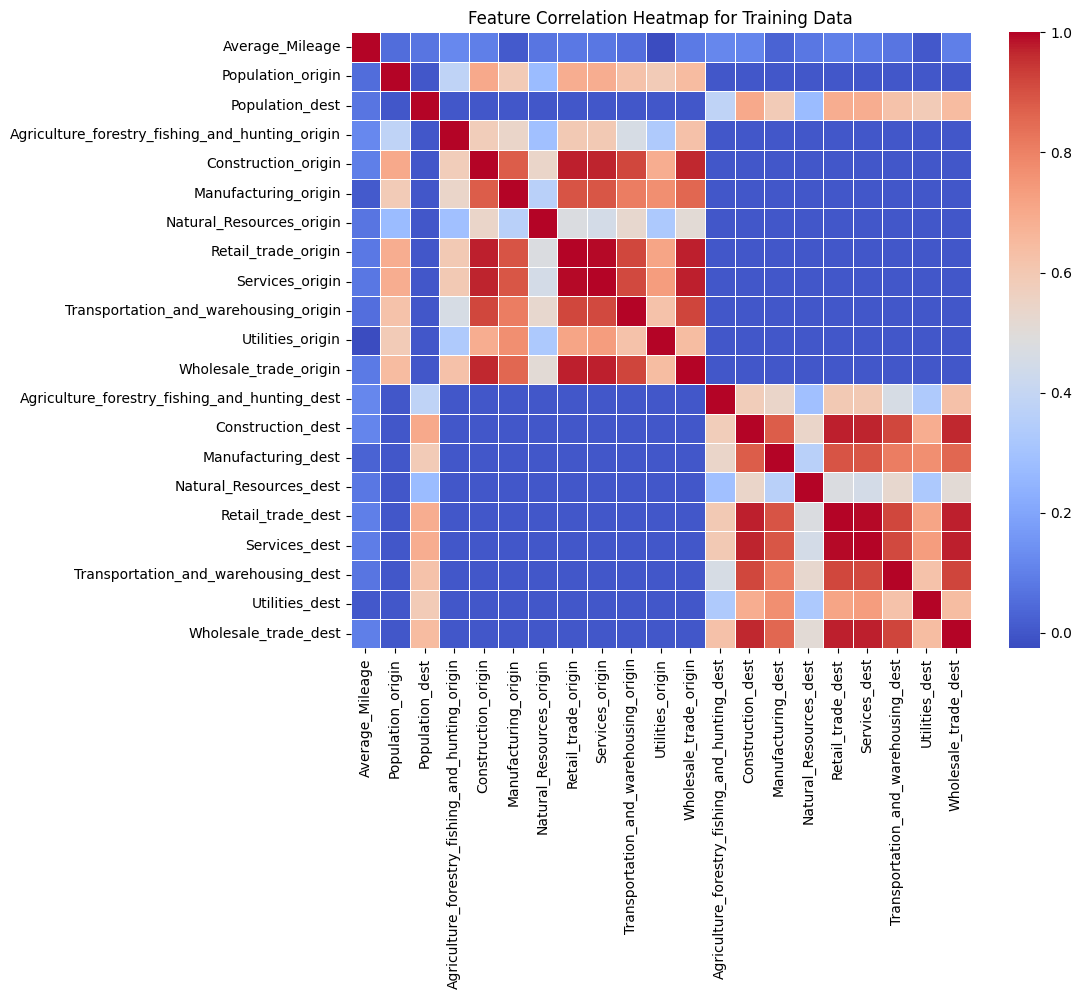

In [6]:
import seaborn as sns
#get correlations of each non-encoded features in dataset
#correlation_matrix = x_train_All_Traffic_scaled.corr()
x_train_All_Traffic_scaled_pd=pd.DataFrame(x_train_All_Traffic_scaled)
x_train_All_Traffic_scaled_pd.columns = column_names_orig
correlation_matrix = x_train_All_Traffic_scaled_pd.corr()
#correlation_matrix = x_train_All_Traffic.corr()

# Generate the heatmap without numbers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Display the heatmap
plt.title("Feature Correlation Heatmap for Training Data")
plt.show()